<a href="https://colab.research.google.com/github/danielk434/MLProject/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: https://www.kaggle.com/c/ghouls-goblins-and-ghosts-boo

# Initialization

In [1]:
trainurl = 'https://raw.githubusercontent.com/danielk434/MLProject/main/train.csv'
testurl = 'https://raw.githubusercontent.com/danielk434/MLProject/main/test.csv'

import pandas as pd
df_train = pd.DataFrame(pd.read_csv(trainurl))
df_test = pd.DataFrame(pd.read_csv(testurl))

In [2]:
#df_train.head()
#df_test.head()

In [3]:
df_train.describe()

id  bone_length  rotting_flesh  hair_length    has_soul
count  371.000000   371.000000     371.000000   371.000000  371.000000
mean   443.676550     0.434160       0.506848     0.529114    0.471392
std    263.222489     0.132833       0.146358     0.169902    0.176129
min      0.000000     0.061032       0.095687     0.134600    0.009402
25%    205.500000     0.340006       0.414812     0.407428    0.348002
50%    458.000000     0.434891       0.501552     0.538642    0.466372
75%    678.500000     0.517223       0.603977     0.647244    0.600610
max    897.000000     0.817001       0.932466     1.000000    0.935721

In [4]:
df_test.describe()

id  bone_length  rotting_flesh  hair_length    has_soul
count  529.000000   529.000000     529.000000   529.000000  529.000000
mean   453.584121     0.425474       0.503637     0.517288    0.464096
std    257.804948     0.136079       0.158552     0.171727    0.179659
min      3.000000     0.000000       0.000000     0.000000    0.000000
25%    239.000000     0.329383       0.393987     0.388189    0.338964
50%    445.000000     0.421989       0.510065     0.520220    0.461294
75%    670.000000     0.519024       0.605957     0.644824    0.584448
max    899.000000     1.000000       1.000000     0.999841    1.000000

# Data Visualizations


In [6]:
monsters = len(df_train.id)
print(monsters)
# There are 371 monsters

# Number of categories in categorical columns (Color and Type)
monster_color = df_train["color"].value_counts().reset_index()
monster_type = df_train["type"].value_counts().reset_index()

371


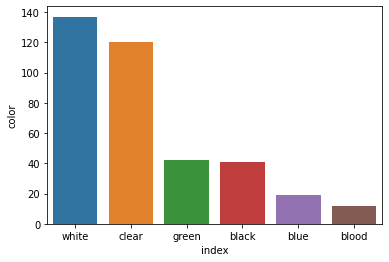

In [7]:
import seaborn as sns
#all
sns.barplot(x = monster_color["index"], y=monster_color["color"])

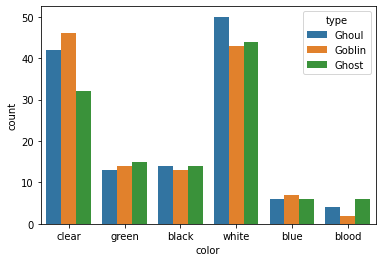

In [8]:
#by type
sns.countplot(x = "color", hue="type", data= df_train)

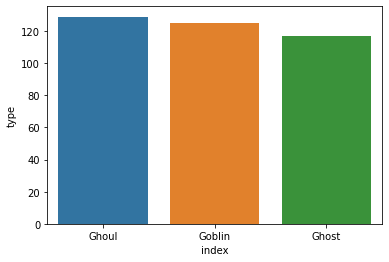

In [9]:
sns.barplot(x = monster_type["index"], y=monster_type["type"]);

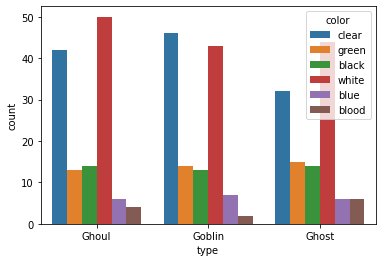

In [10]:
sns.countplot(x='type', hue='color', data= df_train)

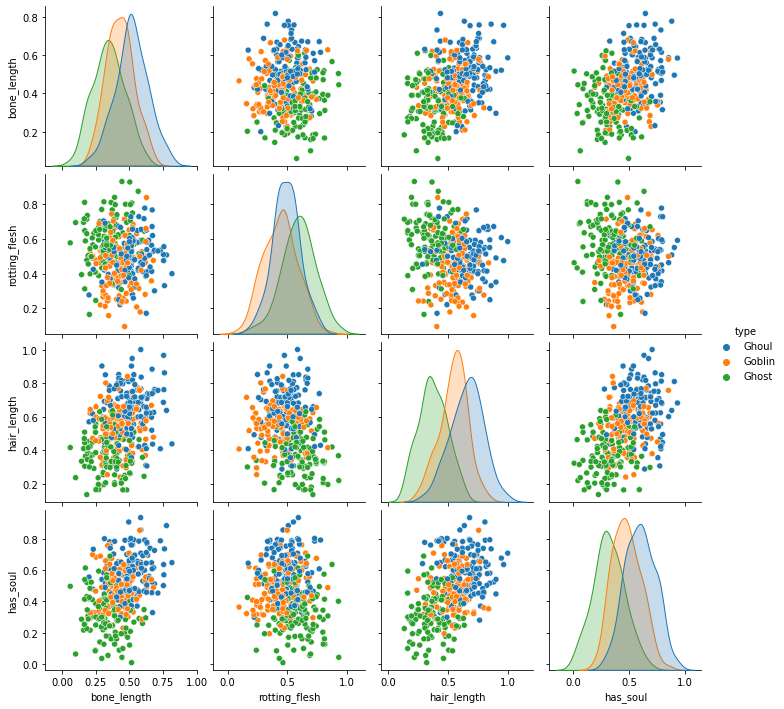

In [11]:
#plot the relationships of quantitative features by type of monster
sns.pairplot(df_train,vars=['bone_length','rotting_flesh','hair_length','has_soul'],diag_kind='kde',hue='type')

# Data Preprocessing

In [12]:
#Drop the IDs from the data sets
df_train = df_train.drop(columns=['id'])

#convert categorical values into numerical
#dictionaries for 'color' and 'type'
color = {'clear': 0, 'green': 1, 'black': 2, 'white': 3, 'blue': 4, 'blood': 5}
type = {'Ghoul': 0, 'Goblin': 1, 'Ghost': 2}

In [13]:
#take the dictionary and apply to columns color and type
#train data
df_train['type'] = df_train['type'].replace(type)
df_train['color'] = df_train['color'].replace(color)

#test data
df_test['color'] = df_test['color'].replace(color)

In [14]:
#confirm code worked as planned
df_train.head()
df_test.head()

id  bone_length  rotting_flesh  hair_length  has_soul  color
0   3     0.471774       0.387937     0.706087  0.698537      2
1   6     0.427332       0.645024     0.565558  0.451462      3
2   9     0.549602       0.491931     0.660387  0.449809      2
3  10     0.638095       0.682867     0.471409  0.356924      3
4  13     0.361762       0.583997     0.377256  0.276364      2

In [15]:
#Create dummy variables for each color
for val in df_train['color'].unique():
  df_train[val] = (df_train['color']==val).astype(int)

#Drop the Color Column
df_train = df_train.drop(columns=['color'])

#Check
df_train.head()

bone_length  rotting_flesh  hair_length  has_soul  type  0  1  2  3  4  5
0     0.354512       0.350839     0.465761  0.781142     0  1  0  0  0  0  0
1     0.575560       0.425868     0.531401  0.439899     1  0  1  0  0  0  0
2     0.467875       0.354330     0.811616  0.791225     0  0  0  1  0  0  0
3     0.776652       0.508723     0.636766  0.884464     0  0  0  1  0  0  0
4     0.566117       0.875862     0.418594  0.636438     2  0  1  0  0  0  0

In [16]:
#Repeating for test data set
for val in df_test['color'].unique():
  df_test[val] = (df_test['color']==val).astype(int)

df_test = df_test.drop(columns=['color'])

# Modelling

## Random Forest Classifier

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 0, 1, 2, 3, 4, 5]
X = df_train.loc[:, features]
y = df_train['type']

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size=0.30)

In [18]:
#Random Forest Classification checking with depths
scores = []
for d in range(1,21):
    rf = RandomForestClassifier(max_depth = d, random_state=0)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    rf_acc = accuracy_score(y_test, y_pred)
    scores.append(rf_acc)

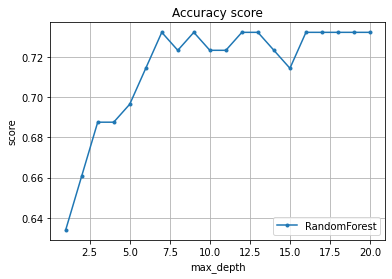

In [19]:
from matplotlib import pylab

d = range(1,21)
pylab.plot(d, scores, marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('max_depth')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [30]:
#Best Random Forest Classification
d = 7

rf = RandomForestClassifier(max_depth=d, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
print('Accuracy for random forest: '+str(rf_acc))

Accuracy for random forest: 0.7321428571428571


#### Apply to Test Data Set

In [21]:
#Apply to Test Data set
test_pred = rf.predict(df_test.loc[:, features])
predictions = pd.DataFrame({'id': df_test['id'], 'type': test_pred})

#Convert numbers back to type for predictions
type = {0: 'Ghoul', 1: 'Goblin', 2: 'Ghost'}
predictions['type'] = predictions['type'].replace(type)

predictions.head()

id    type
0   3   Ghoul
1   6  Goblin
2   9   Ghoul
3  10   Ghost
4  13   Ghost

####  K-Fold Cross Validation: RFC

In [22]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

scores = []
mean_scores = []
for d in range(1,21):
    rf = RandomForestClassifier(max_depth = d, random_state=0)
    cv = cross_validate(rf, X, y, cv = 4)
    scores.append(cv['test_score'])
    mean_scores.append(cv['test_score'].mean())

Text(0.5, 1.0, 'mean test score')

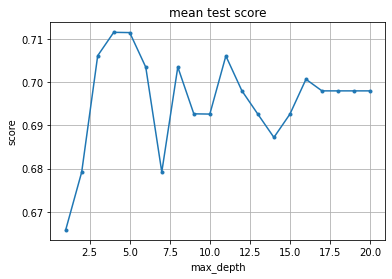

In [23]:
d = range(1,21)
pylab.plot(d, mean_scores, marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('max_depth')
pylab.ylabel('score')
pylab.title('mean test score')

In [29]:
from sklearn.model_selection import cross_validate
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=4, random_state=0)
cv = cross_validate(rf, X, y, cv = 4)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.72043011 0.74193548 0.67741935 0.70652174]
0.7115766713417484


## Logistic Regression

### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred)
print('Accuracy for Logistic Regression: '+str(logreg_acc))

Accuracy for Logistic Regression: 0.7232142857142857


### Cross Validation

In [27]:
from sklearn.model_selection import cross_validate

logreg_cv = LogisticRegression()
cv = cross_validate(logreg_cv, X, y, cv = 4)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.74193548 0.7311828  0.76344086 0.66304348]
0.7249006545114539
